## CHAPTER 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = 2*np.random.rand(100,1)
y = 4 +3*x + np.random.randn(100,1) # Y = 4 + 3x + white noise

In [2]:
x_b = np.c_[np.ones((100,1)), x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [3]:
theta_best

array([[3.63383302],
       [3.28888111]])

In [4]:
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 3.63383302],
       [10.21159525]])

In [5]:
x_new_b

array([[1., 0.],
       [1., 2.]])

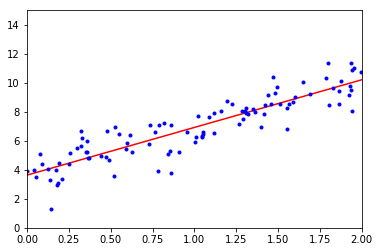

In [6]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

#### Performing Linear Regression with Sikit-Learn

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.63383302]), array([[3.28888111]]))

In [8]:
lin_reg.predict(x_new)

array([[ 3.63383302],
       [10.21159525]])

#### Gradient Descent Alg

In [9]:
eta = 0.5
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta-eta*gradients

theta

array([[-3.09133798e+73],
       [-3.67198612e+73]])

### Stochastic Gradient Descent

In [13]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1) #rabdom initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta -eta * gradients

In [14]:
theta

array([[3.61931872],
       [3.25292209]])

### Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly_features.fit_transform(x)
x[0]

array([1.51106771])

In [16]:
x_poly[0]

array([1.51106771, 2.28332564])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.73229157]), array([[2.98586518, 0.15123514]]))

### Ploting Learning Curves

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")

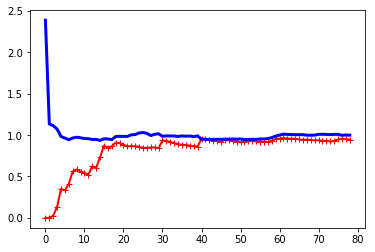

In [46]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

### Regularized Linear Models

In [35]:
#Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver= "cholesky")
ridge_reg.fit(x, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [37]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(x, y)
sgd_reg.predict([[1.5]])

C:\Users\d12669\AppData\Local\conda\conda\envs\localEnv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([8.64450039])

#### Elastic Net

In [39]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)
elastic_net.fit(x, y)
elastic_net.predict([[1.5]])

array([8.29866936])

#### Early Stopping

In [50]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

poly_scaler = Pipeline([
                        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(x_train)
X_val_poly_scaled = poly_scaler.transform(x_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epocj in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        

C:\Users\d12669\AppData\Local\conda\conda\envs\localEnv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\d12669\AppData\Local\conda\conda\envs\localEnv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\d12669\AppData\Local\conda\conda\envs\localEnv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\d12669\AppData\Local\conda\conda\envs\localEnv\lib\site-packages\sklearn\utils\validation.py:760: DataC

In [51]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)

In [53]:
best_epoch

49

### Logit Regression

In [55]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [56]:
X = iris['data'][:,3:]
y =(iris['target']==2).astype(np.int)

In [57]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

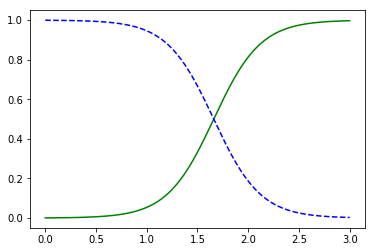

In [61]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_new)
plt.plot(X_new, y_prob[:, 1], "g-", label='Iris Virginica')
plt.plot(X_new, y_prob[:, 0], "b--", label='Not Iris Virginica')